In [ ]:
#Load libraries
library(tidyverse)
install.packages("pysch")
library(psych)
library(dplyr)
library(corrplot)
library(ltm)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘pysch’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


ERROR: ignored

In [ ]:
#Read Dataset
CW_Dataset <- read.csv(file= 'Newloyalty.csv')
#Attach Dataset
attach(CW_Dataset)

In [ ]:
#Check sum of null values
sum(!complete.cases(CW_Dataset))

#Clean dataset
CW_Dataset <- na.omit(CW_Dataset)

if (any(is.na(CW_Dataset))==TRUE) 
{
  print("Null values exist")
} else {
  print("No null values exist")
}

[1] 131

[1] "No null values exist"


In [ ]:
#View Cleaned Dataset
head(CW_Dataset,50)
summary(CW_Dataset)

,resp_no,branch,profess,gender,educatio,loy1_1,loy2_1,loy3_1,loy4_1,loy5_1,⋯,val3_1,sat1_1,sat2_1,sat3_1,sav_1,loans_1,long_1,age_1,income_1,CLV
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
2,2,5,1,1,4,7,5,4,4.376471,7.000000,⋯,10,7,7.000000,10.000000,99.00000,52.90401,12.0000,33.00000,2,5874.402
4,4,4,3,1,3,4,4,4,4.000000,4.000000,⋯,5,6,6.000000,8.000000,70.00000,52.90401,24.0000,59.00000,4,17229.878
6,8,2,2,1,2,7,3,2,3.000000,7.000000,⋯,9,6,5.000000,9.000000,100.00000,52.90401,60.0000,45.13924,2,3260.774
8,10,3,2,2,2,7,5,2,4.000000,7.000000,⋯,10,7,5.811798,8.184136,64.94317,1.00000,36.0000,59.00000,2,2610.752
10,14,4,3,1,2,4,4,4,3.000000,1.000000,⋯,1,6,6.000000,10.000000,5.00000,52.90401,78.0000,42.00000,5,5248.593
13,30,4,1,2,4,6,5,5,4.000000,6.000000,⋯,10,7,7.000000,10.000000,50.00000,52.90401,12.0000,30.00000,2,3821.591
14,31,5,2,2,3,7,2,5,1.000000,7.000000,⋯,8,6,6.000000,8.000000,100.00000,52.90401,36.0000,45.13924,3,4785.308
15,32,4,3,1,2,3,1,1,4.000000,3.000000,⋯,5,3,3.000000,5.000000,100.00000,52.90401,36.0000,35.00000,3,5161.686
17,34,4,3,1,3,4,4,4,4.000000,4.000000,⋯,8,6,6.000000,8.000000,100.00000,100.00000,24.0000,45.13924,2,3293.573


    resp_no         branch         profess           gender     
 Min.   :   2   Min.   :1.000   Min.   : 1.000   Min.   :0.000  
 1st Qu.: 494   1st Qu.:2.000   1st Qu.: 1.000   1st Qu.:1.000  
 Median :1180   Median :3.000   Median : 2.000   Median :2.000  
 Mean   :1263   Mean   :3.208   Mean   : 2.119   Mean   :1.595  
 3rd Qu.:2038   3rd Qu.:5.000   3rd Qu.: 3.000   3rd Qu.:2.000  
 Max.   :2736   Max.   :6.000   Max.   :12.000   Max.   :2.000  
    educatio         loy1_1          loy2_1          loy3_1         loy4_1     
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.00   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:6.000   1st Qu.:3.000   1st Qu.:3.00   1st Qu.:4.000  
 Median :3.000   Median :7.000   Median :4.000   Median :4.00   Median :4.000  
 Mean   :3.101   Mean   :6.228   Mean   :4.094   Mean   :4.01   Mean   :4.299  
 3rd Qu.:4.000   3rd Qu.:7.000   3rd Qu.:5.000   3rd Qu.:5.00   3rd Qu.:5.000  
 Max.   :5.000   Max.   :7.000   Max.   :7.000   Max.   :7.00   M

IncomeGroup,1,2,3,4,5,6
DataDistributions,65,197,240,154,73,7


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   2.992   4.000   6.000 

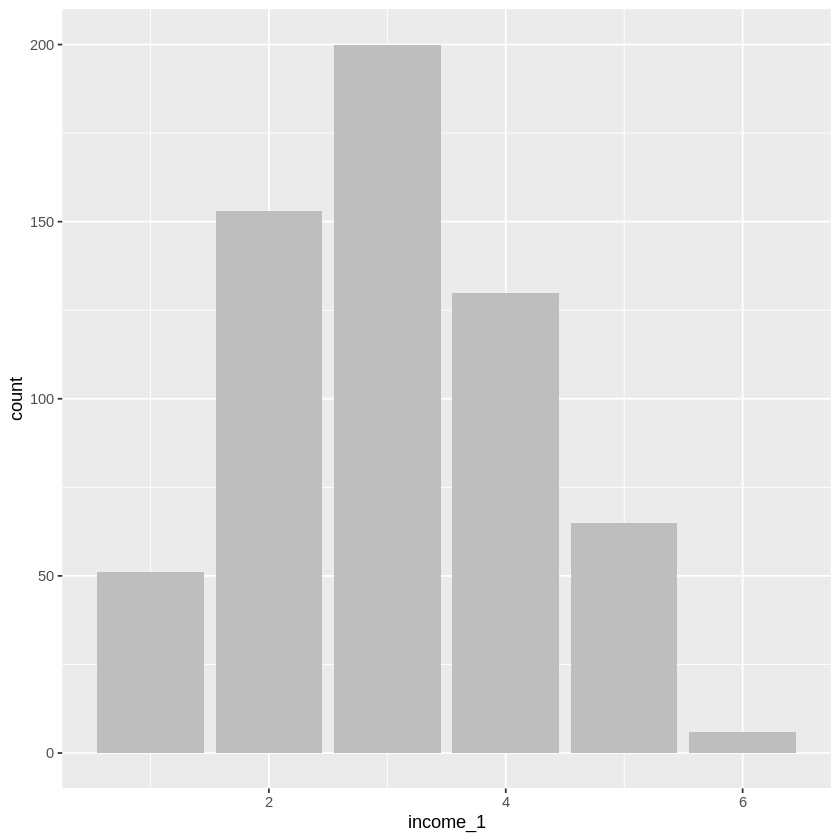

In [ ]:
#Data Analysis 

#By Income

ggplot(CW_Dataset) + geom_bar (aes(x=income_1),position = "stack", fill = "grey")
tab1 <- table(income_1)
t(data.frame(IncomeGroup=names(tab1),DataDistributions=as.vector(tab1)))
summary(income_1)

Branch,1,2,3,4,5,6
DataDistribution,162,102,100,183,149,29


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.000   2.000   3.000   3.196   4.000   6.000      11 

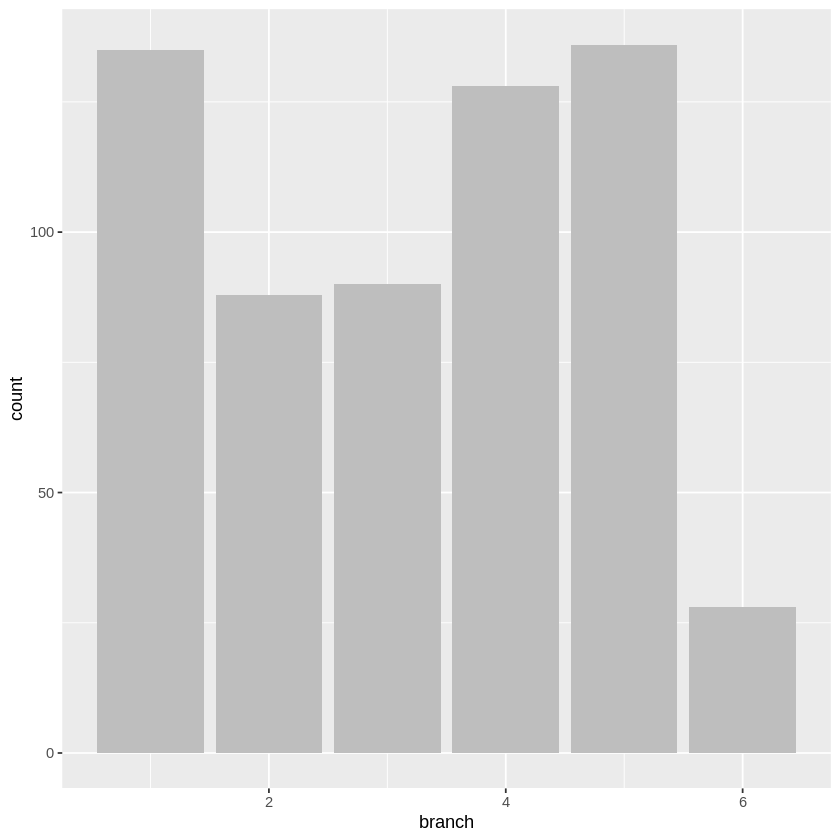

In [ ]:
#By Branch

ggplot(CW_Dataset) + geom_bar (aes(x=branch),position = "stack", fill = "grey")
tab2 <- table(branch)
t(data.frame(Branch=names(tab2),DataDistribution=as.vector(tab2)))
summary(branch)

Age,14,19,20,21,22,23,24,25,26,27,⋯,68,69,70,71,72,73,75,76,78,79
DataDistribution,1,3,5,2,7,11,12,13,10,11,⋯,2,3,4,8,1,2,2,1,1,1


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  14.00   36.00   45.14   45.21   54.00   79.00 

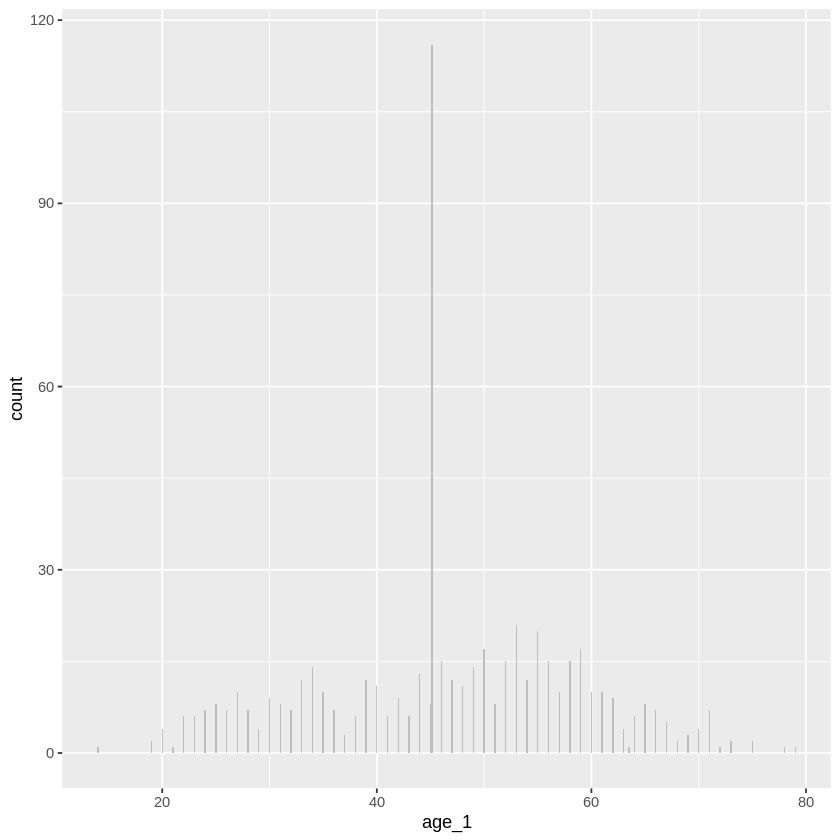

In [ ]:
#By Age

ggplot(CW_Dataset) + geom_bar (aes(x=age_1),position = "stack", fill = "grey")
tab3 <- table(age_1)
t(data.frame(Age=names(tab3),DataDistribution=as.vector(tab3)))
summary(age_1)

Education,0,1,2,3,4,5
DataDistribution,1,34,183,272,223,18


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   2.000   3.000   3.007   4.000   5.000       5 

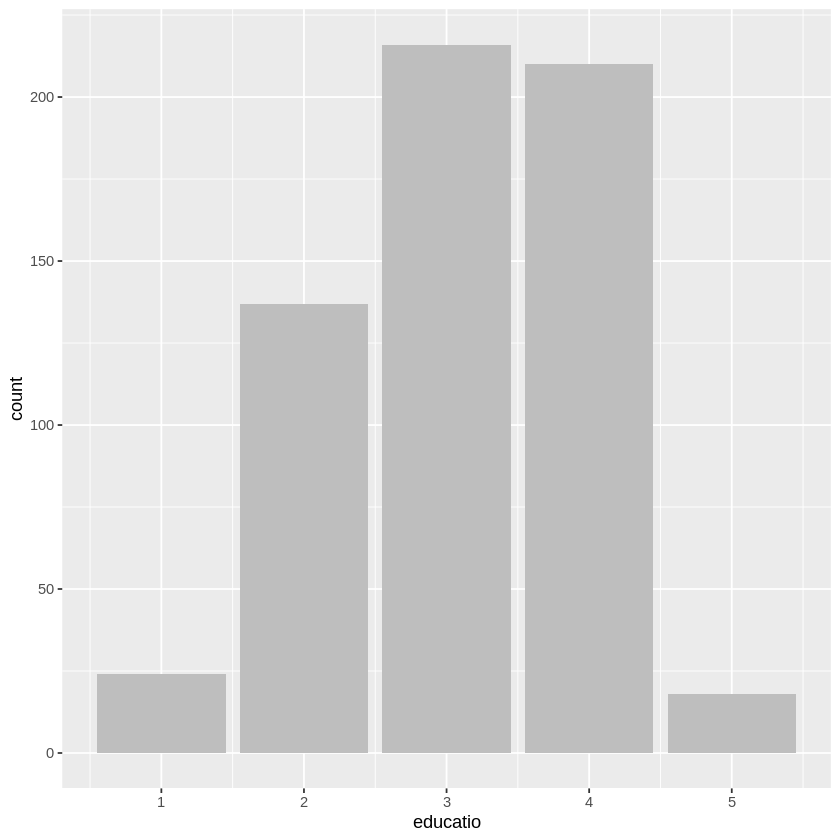

In [ ]:
#By Education 

ggplot(CW_Dataset) + geom_bar (aes(x=educatio),position = "stack", fill = "grey")
tab3 <- table(educatio)
t(data.frame(Education=names(tab3),DataDistribution=as.vector(tab3)))
summary(educatio)

Duration,1,2,3,3.5,4,5,6,7,8,8.5,⋯,72,76,78,80,84,96,100,120,156,240
DataDistribution,5,3,10,1,5,6,33,2,16,1,⋯,4,2,50,1,1,3,1,7,1,1


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   12.00   24.00   31.48   36.00  240.00 

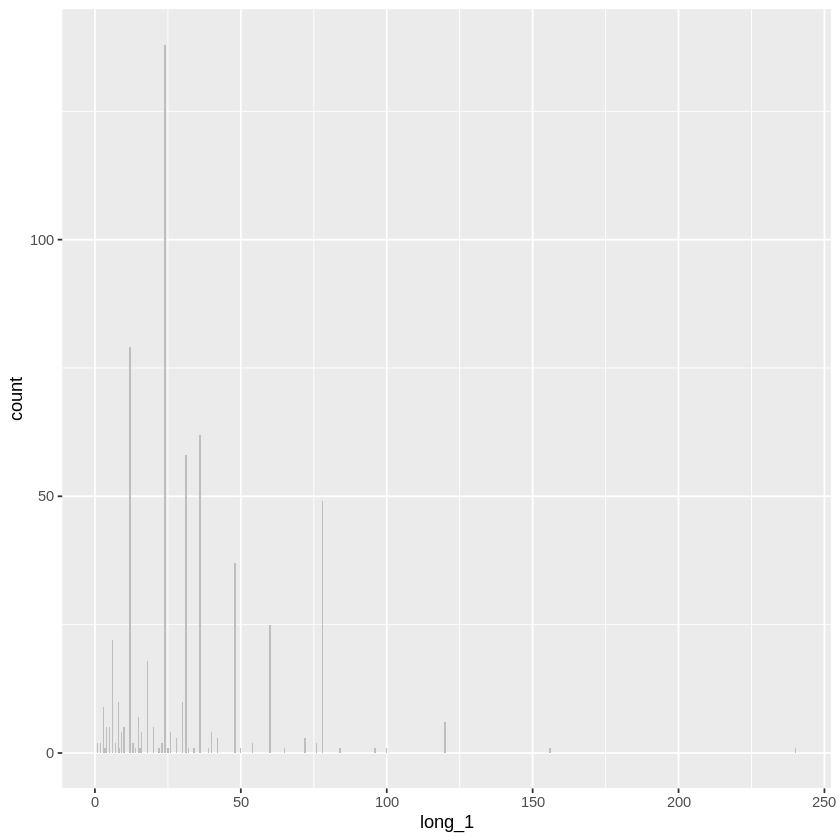

In [ ]:
#By Duration

ggplot(CW_Dataset) + geom_bar (aes(x=long_1),position = "stack", fill = "grey")
tab3 <- table(long_1)
t(data.frame(Duration=names(tab3),DataDistribution=as.vector(tab3)))
summary(long_1)

Savings,0.02,0.3,0.5,1,2,3,4,5,6,7,⋯,75,76,77.5,80,85,90,95,98,99,100
DataDistribution,1,1,3,20,4,1,2,30,2,1,⋯,28,1,1,47,7,36,11,2,4,251


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.02   30.00   75.00   64.73  100.00  100.00 

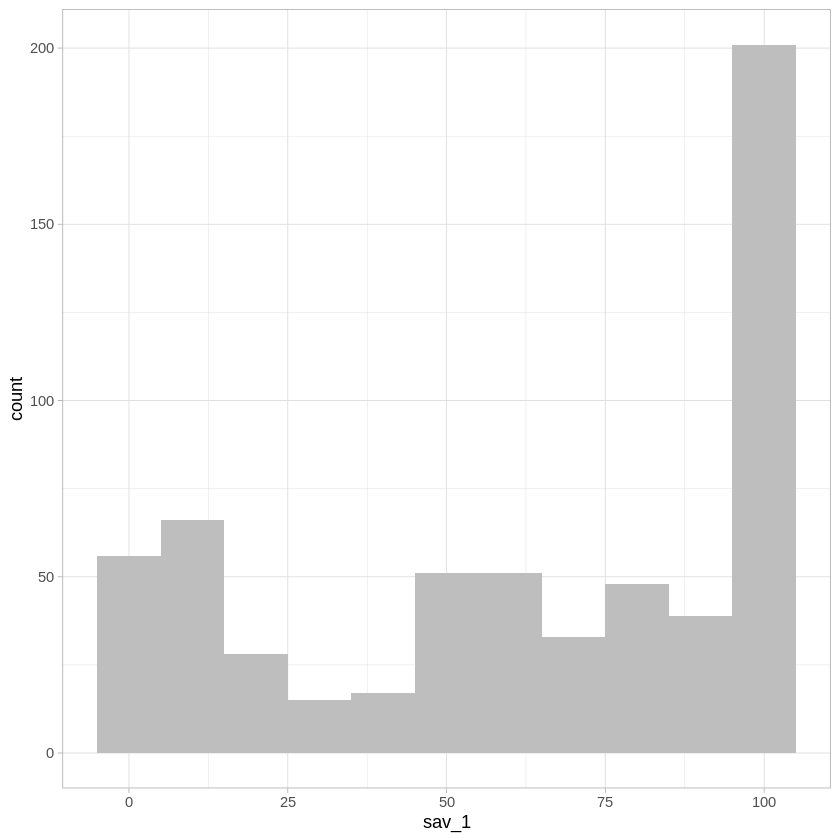

In [ ]:
#By Savings 

ggplot(CW_Dataset, aes(x=sav_1)) + geom_histogram (fill = "grey",binwidth = 10) + theme_light()
tab3 <- table(sav_1)
t(data.frame(Savings=names(tab3),DataDistribution=as.vector(tab3)))
summary(sav_1)

Loan,0.1,0.25,0.75,0.8,0.99,1,2,3,4,5,⋯,66,70,75,80,85,90,95,96,99,100
DataDistribution,2,1,1,1,1,13,5,2,1,15,⋯,2,5,21,13,1,12,4,1,2,98


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.10   50.00   52.90   52.71   52.90  100.00 

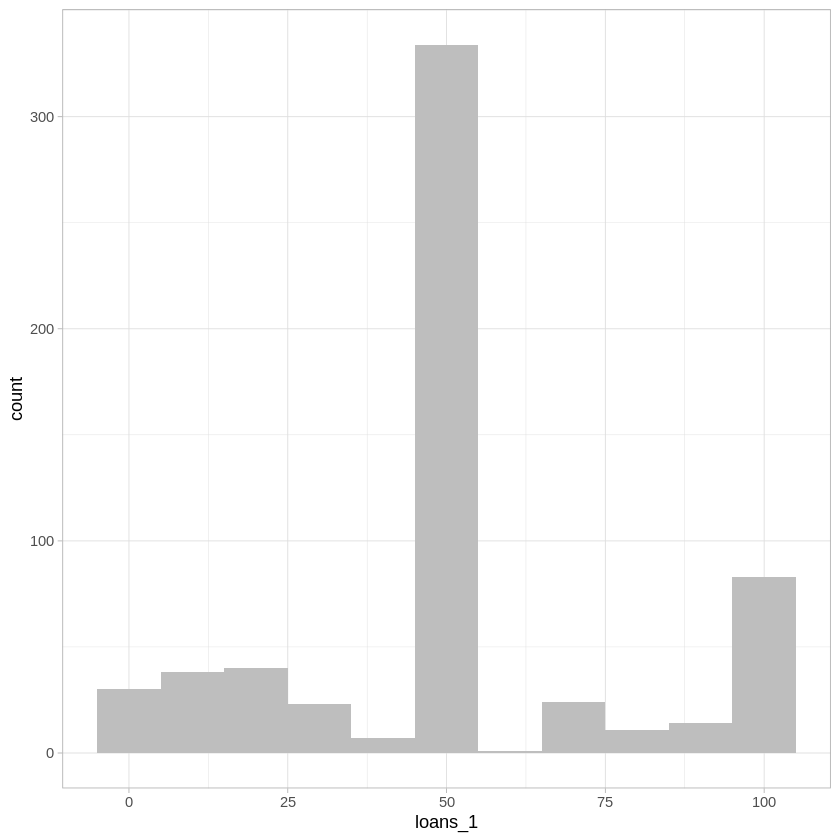

In [ ]:
#By Loan

ggplot(CW_Dataset, aes(x=loans_1)) + geom_histogram (fill = "grey",binwidth=10) + theme_light()
tab3 <- table(loans_1)
t(data.frame(Loan=names(tab3),DataDistribution=as.vector(tab3)))
summary(loans_1)

Gender,0,1,2
DataDistribution,1,297,433


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   1.000   2.000   1.591   2.000   2.000       5 

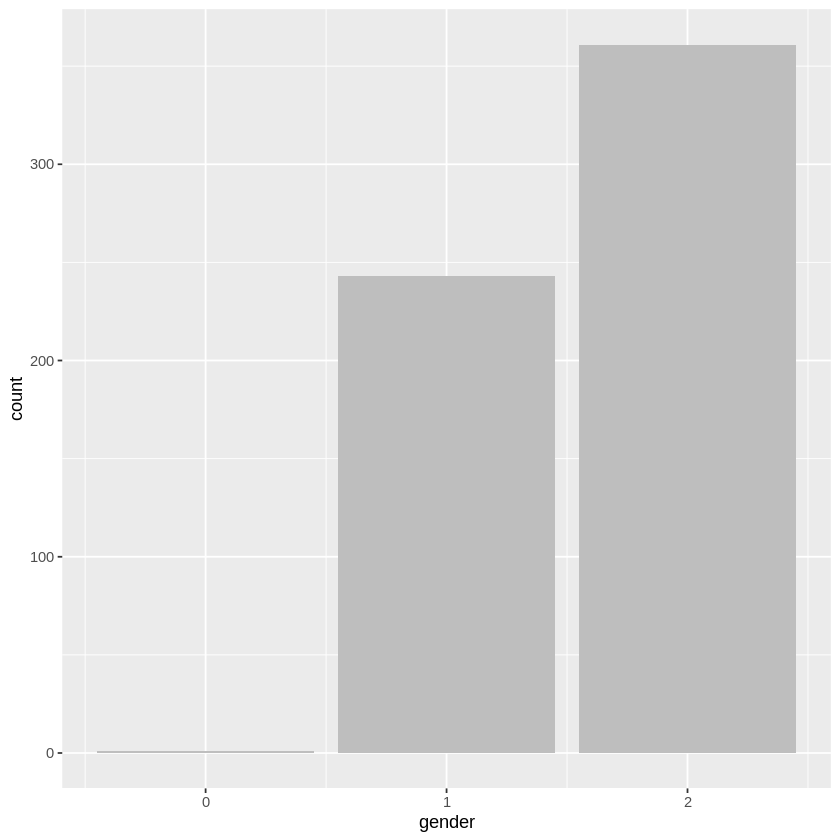

In [ ]:
#By Gender

ggplot(CW_Dataset) + geom_bar (aes(x=gender),position = "stack", fill = "grey")
tab3 <- table(gender)
t(data.frame(Gender=names(tab3),DataDistribution=as.vector(tab3)))
summary(gender)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1181    3805    5087    6704    7947   27995 

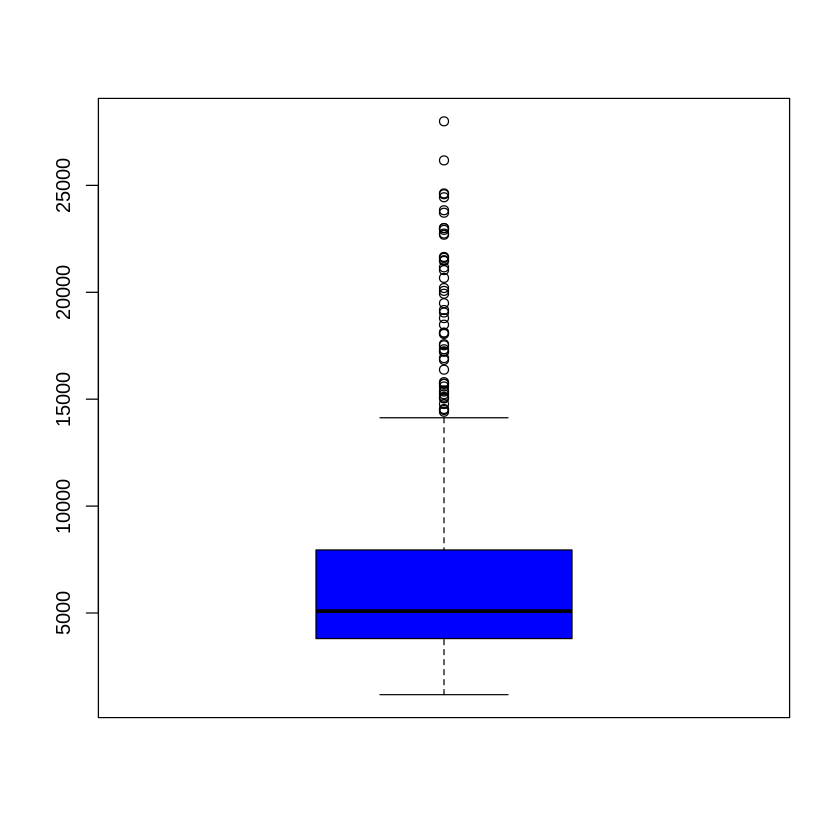

In [ ]:
#Explore CLV
summary(CLV)
boxplot(CLV, col= "blue")

1        2        3        4        5        6 
5413.931 5801.812 6538.347 7710.275 8804.296 5708.877

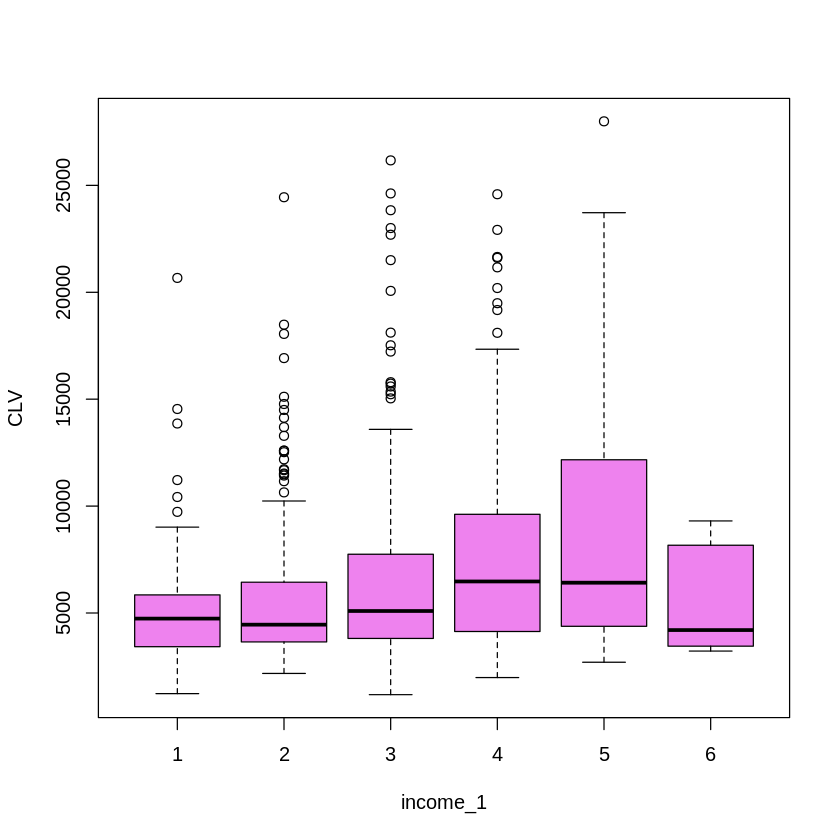

In [ ]:
#Compare CLV with income
tapply(CLV,income_1, mean)
boxplot(CLV ~ income_1, col = "violet")

1        2        3       12 
7251.717 6869.726 6371.626 5530.111

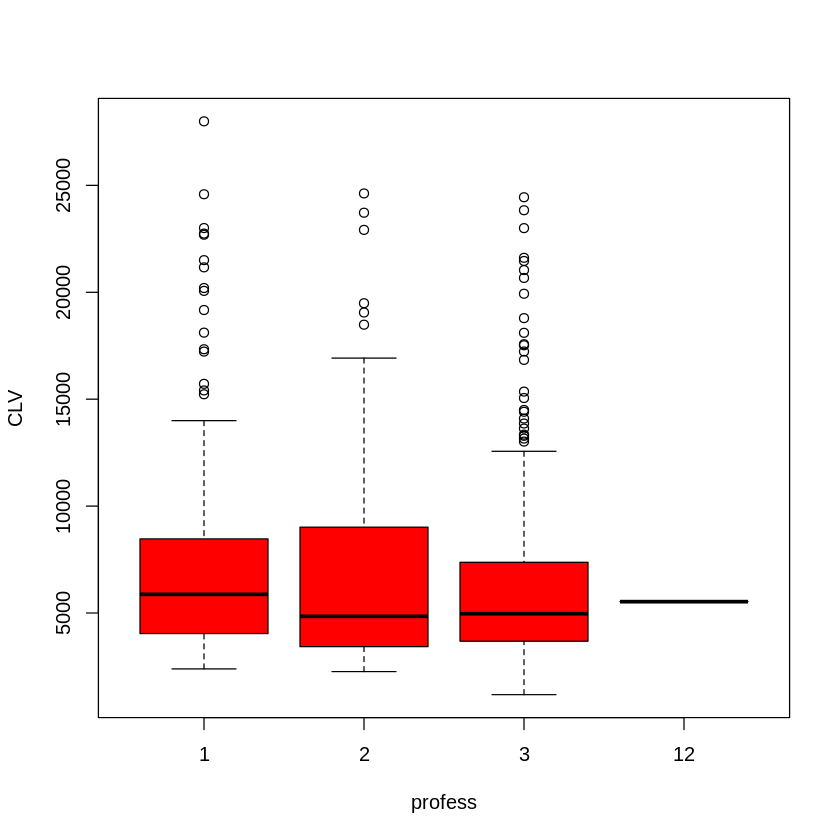

In [ ]:
# Compare CLV with Profession
tapply(CLV,profess, mean)
boxplot(CLV ~ profess, col = "red")

In [ ]:
#Cronbach Alpha

alpha(CW_Dataset, check.keys = TRUE)
loy_item3 <- data.frame(cbind(loy3_1, loy1_1))
loy_item3_corr <- cor(as.matrix(loy_item3), use = "pairwise.complete.obs")
alpha(loy_item3_corr, check.keys = FALSE)
par(mar = c(4,4,1,1))

#Check relationship between Loans and Income

plot(x = long_1,y = income_1,type ="h")

#Run 3 instances

R1 <- CW_Dataset[,c(6:11)]
cronbach.alpha(data = R1)
R2 <- CW_Dataset[,c(12:14)]
cronbach.alpha(data = R2)
R3 <- CW_Dataset[,c(15:17)]
cronbach.alpha(data = R3)


ERROR: ignored

In [ ]:
DF_val <- CW_Dataset %>% dplyr::select(val1_1, val2_1, val3_1)
DF_val_mat <- cor(DF_val, use = "pairwise.complete.obs") %>% print ()
corrplot(DF_val_mat)
psych :: alpha(DF_val)


In [ ]:
DF_sat <- CW_Dataset %>% dplyr::select(loy6_1,loy5_1)
DF_sat_mat <- cor(DF_sat,use= "pairwise.complete.obs")%>% print()
corrplot(DF_sat_mat)

In [ ]:
#EFA
class(DF_val_mat)
DF2_val_mat <- as.data.frame(DF_val_mat)
EFAvals <- fa(DF_val_mat)
EFAvals

#Calculate Eigen Values

eigen_efa_val <- eigen(DF2_val_mat) %>% print()
scree(DF2_val_mat)

#
F_EFAvals <- EFAvals$loadings %>% print()
Tval <- (val1_1 + val2_1 + val3_1)/3



In [ ]:
#Mediation Analysis
# Figure A
FigA <- lm(formula = "CLV ~ sav_1", data = CW_Dataset)
print(summary(FigA))
# Figure B
FigB <- lm(formula = "income_1 ~ sav_1", data = CW_Dataset)
print(summary(FigB))
# Figure C
FigC <- lm(formula = "CLV ~ income_1 + sav_1", data = CW_Dataset)
print(summary(FigC))
#Figure D
FigD <- lm(formula = "CLV ~ income_1 + sav_1 + educatio", data = CW_Dataset)
print(summary(FigD))


In [ ]:
#Moderation Analysis

Modlysis <- lm(CLV ~ sav_1 + income_1 + long_1 * income_1, data = CW_Dataset)
print(summary(Modlysis))
ps_model <- plotSlopes(Modlysis, plotx="long_1", modx="income_1", xlab = "loans", ylab = "income",
modxVals = "std.dev")

par(mar = c(1,1,1,1))
corr_arr <- cor(x = ,CW_Dataset[,c('profess','sat2_1','sat3_1')],use = "complete.obs")
corrplot(corr_arr, method = "color")
pairs(CW_Dataset, col=income_1)


In [ ]:
#Regression Modelling

#Define formulas 

getRMSE <- function(y_actual, y_predicted){
return(sqrt(mean((y_actual - y_predicted)^2)))
}

getMAE <- function(y_actual, y_predicted){
return(mean(abs(y_actual - y_predicted)))
}

getR2score <- function(y_actual, y_predicted){
rss <- sum((y_actual - y_predicted)^2)
tss <- sum((y_actual - mean(y_actual))^2)
rsq <- 1 - rss/tss
return(rsq)
}

#Split Data into 2 test samples

records <- sample(row.names(CW_Dataset))
trainDataset <- CW_Dataset[records[c(1 : round(length(records) * 0.7))],]
testDataset <- CW_Dataset[records[c(round(length(records) * 0.7) : length(records))],]
output <- "CLV"
inputs <- columns[-c(which(columns == output))]
formular <- paste(output, "~.")

# MODEL 1

linearModel <- lm(formula = " loy1_1 ~ age_1", data = trainDataset)
predictorInput <- subset(testDataset, select = inputs)
y_predicted <- predict(linearModel, predictorInput)
y_actual <- testDataset[,output]
linearModelRMSE <- getRMSE(y_actual, y_predicted)
linearModelMAE <- getMAE(y_actual, y_predicted)
getR2score(y_actual, y_predicted)

# MODEL 2
linearModel <- lm(formula = " CLV ~ loans_1", data = trainDataset)
predictorInput <- subset(testDataset, select = inputs)
y_predicted <- predict(linearModel, predictorInput)
y_actual <- testDataset[,output]
linearModelRMSE <- getRMSE(y_actual, y_predicted)
linearModelMAE <- getMAE(y_actual, y_predicted)
getR2score(y_actual, y_predicted)

# MODEL 3

linearModel <- lm(formula = " income_1 ~ educatio", data = trainDataset)
predictorInput <- subset(testDataset, select = inputs)
y_predicted <- predict(linearModel, predictorInput)
y_actual <- testDataset[,output]
linearModelRMSE <- getRMSE(y_actual, y_predicted)
linearModelMAE <- getMAE(y_actual, y_predicted)
getR2score(y_actual, y_predicted)

# MODEL 4

linearModel <- lm(formula = " CLV ~ sav_1", data = trainDataset)
predictorInput <- subset(testDataset, select = inputs)
y_predicted <- predict(linearModel, predictorInput)
y_actual <- testDataset[,output]
linearModelRMSE <- getRMSE(y_actual, y_predicted)
linearModelMAE <- getMAE(y_actual, y_predicted)
getR2score(y_actual, y_predicted)

#MODEL 5

linearModel <- lm(formula = " CLV ~ income_1", data = trainDataset)
predictorInput <- subset(testDataset, select = inputs)
y_predicted <- predict(linearModel, predictorInput)
y_actual <- testDataset[,output]
linearModelRMSE <- getRMSE(y_actual, y_predicted)
linearModelMAE <- getMAE(y_actual, y_predicted)
getR2score(y_actual, y_predicted)



Call:
lm(formula = CLV ~ loy1_1)

Residuals:
   Min     1Q Median     3Q    Max 
 -4972  -2938  -1506   1257  20950 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4088.3      841.4   4.859 1.44e-06 ***
loy1_1         422.4      133.3   3.170  0.00159 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4454 on 734 degrees of freedom
Multiple R-squared:  0.0135,	Adjusted R-squared:  0.01216 
F-statistic: 10.05 on 1 and 734 DF,  p-value: 0.00159


integer(0)

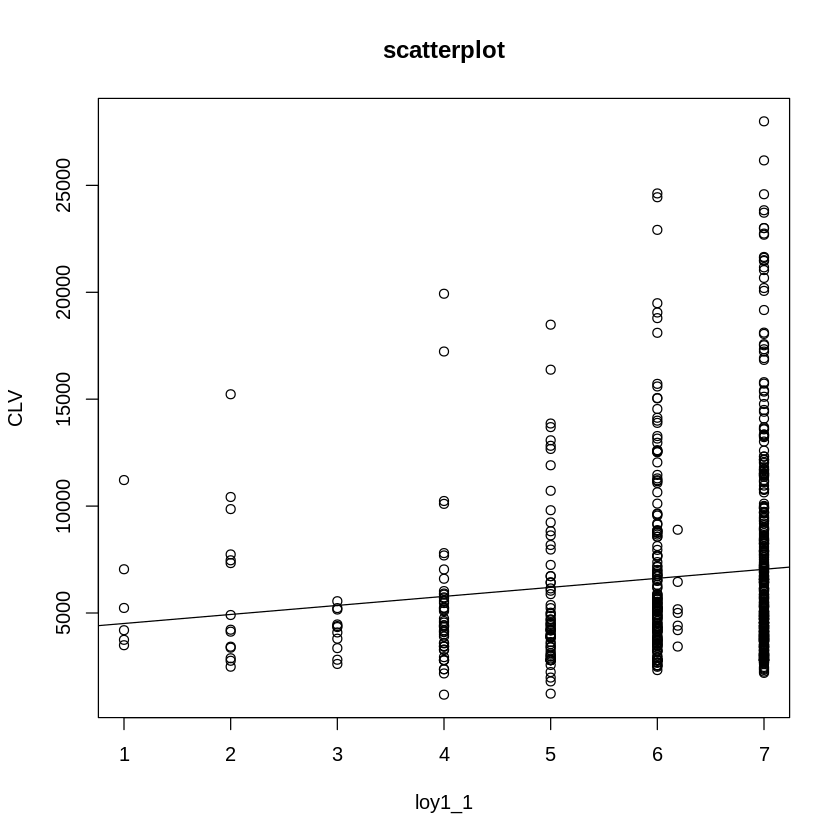

In [ ]:
reg2 <- lm(CLV ~ loy1_1)
summary(reg2)
plot(loy1_1, CLV, main="scatterplot") + abline(reg2)


Call:
lm(formula = CLV ~ age_1)

Residuals:
   Min     1Q Median     3Q    Max 
 -5554  -2885  -1405   1346  21294 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4206.65     624.67   6.734 3.33e-11 ***
age_1          55.24      13.34   4.142 3.84e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4433 on 734 degrees of freedom
Multiple R-squared:  0.02284,	Adjusted R-squared:  0.02151 
F-statistic: 17.16 on 1 and 734 DF,  p-value: 3.842e-05


integer(0)

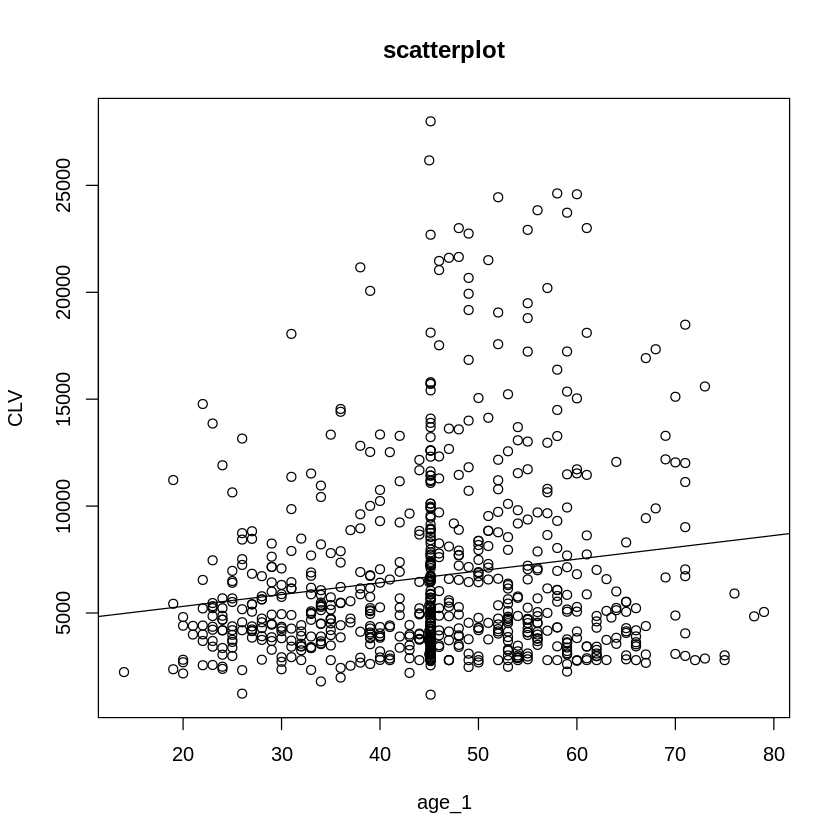

In [ ]:
reg3 = lm(CLV ~ age_1)
summary(reg3)
plot(age_1,CLV , main="scatterplot") + abline(reg3)


Call:
lm(formula = CLV ~ income_1)

Residuals:
   Min     1Q Median     3Q    Max 
 -5933  -2810  -1431   1258  19656 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4269.0      452.1   9.442  < 2e-16 ***
income_1       813.9      141.1   5.767 1.19e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4386 on 734 degrees of freedom
Multiple R-squared:  0.04334,	Adjusted R-squared:  0.04204 
F-statistic: 33.25 on 1 and 734 DF,  p-value: 1.192e-08


`geom_smooth()` using formula 'y ~ x'



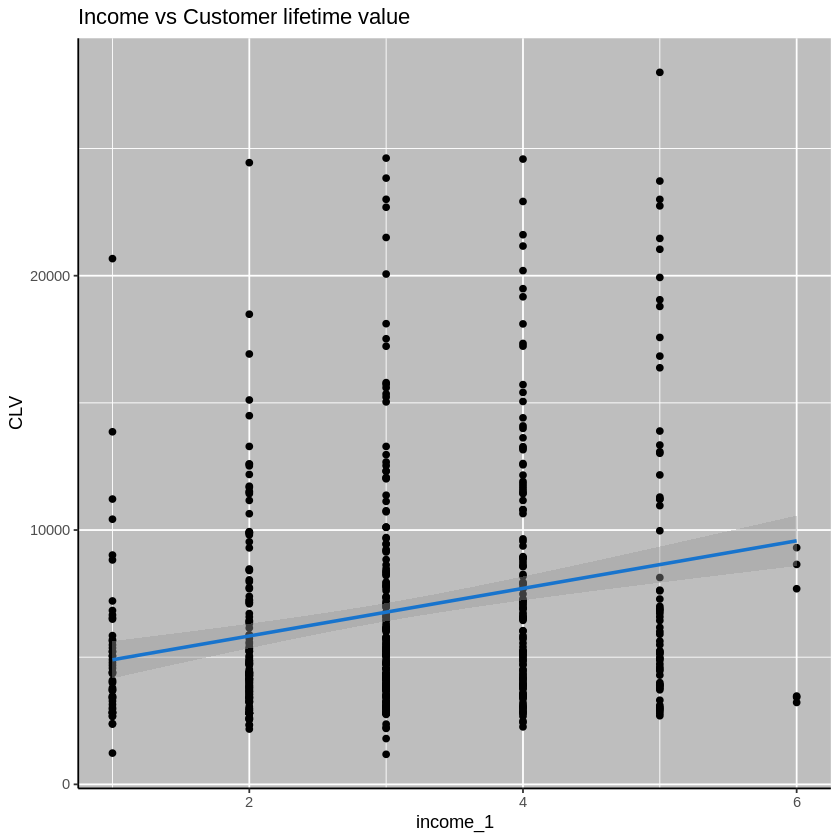

In [ ]:
model_3 <- lm(CLV ~ income_1)
summary(model_3)
ggplot(data = CW_Dataset, aes(x = income_1, y = CLV)) +
        geom_point() +
        stat_smooth(method = "lm", col = "dodgerblue3") +
        theme(panel.background = element_rect(fill = "Grey"),
              axis.line.x=element_line(),
              axis.line.y=element_line()) +
        ggtitle("Income vs Customer lifetime value")


Call:
lm(formula = CLV ~ sat1_1)

Residuals:
   Min     1Q Median     3Q    Max 
 -5476  -2902  -1604   1245  21259 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6524.24     624.17  10.453   <2e-16 ***
sat1_1         30.16     100.99   0.299    0.765    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4484 on 734 degrees of freedom
Multiple R-squared:  0.0001215,	Adjusted R-squared:  -0.001241 
F-statistic: 0.08917 on 1 and 734 DF,  p-value: 0.7653


`geom_smooth()` using formula 'y ~ x'



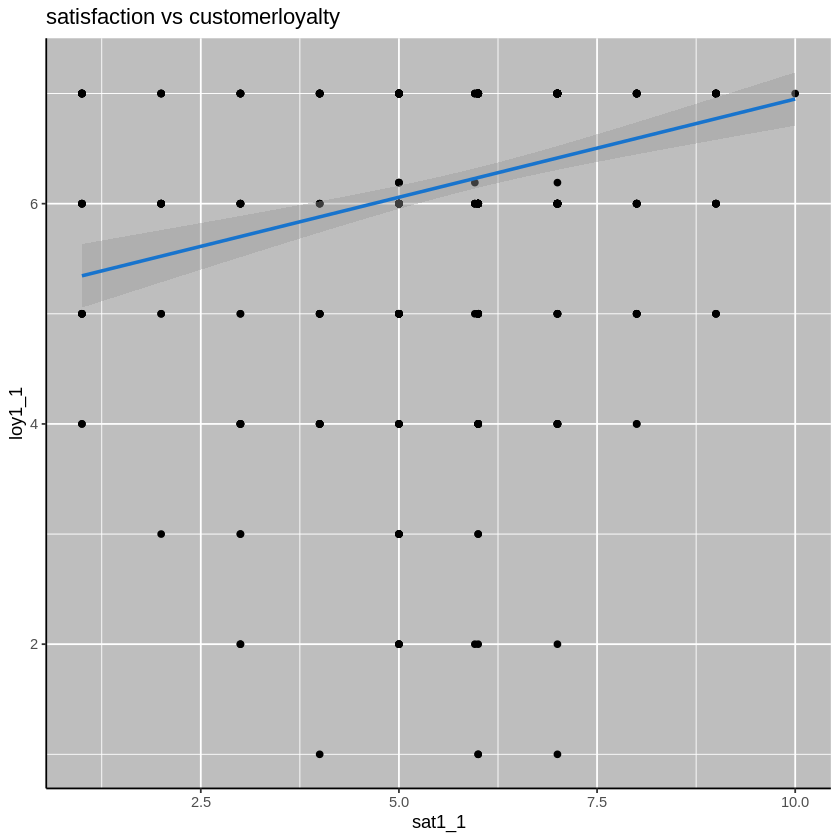

In [ ]:
model_4 <- lm(CLV ~ sat1_1)
summary(model_4)
ggplot(data =CW_Dataset, aes(x = sat1_1, y = loy1_1)) +
        geom_point() +
        stat_smooth(method = "lm", col = "dodgerblue3") +
        theme(panel.background = element_rect(fill = "Grey"),
              axis.line.x=element_line(),
              axis.line.y=element_line()) +
        ggtitle("satisfaction vs customerloyalty ")


Call:
lm(formula = CLV ~ loy1_1)

Residuals:
   Min     1Q Median     3Q    Max 
 -4972  -2938  -1506   1257  20950 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4088.3      841.4   4.859 1.44e-06 ***
loy1_1         422.4      133.3   3.170  0.00159 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4454 on 734 degrees of freedom
Multiple R-squared:  0.0135,	Adjusted R-squared:  0.01216 
F-statistic: 10.05 on 1 and 734 DF,  p-value: 0.00159


`geom_smooth()` using formula 'y ~ x'



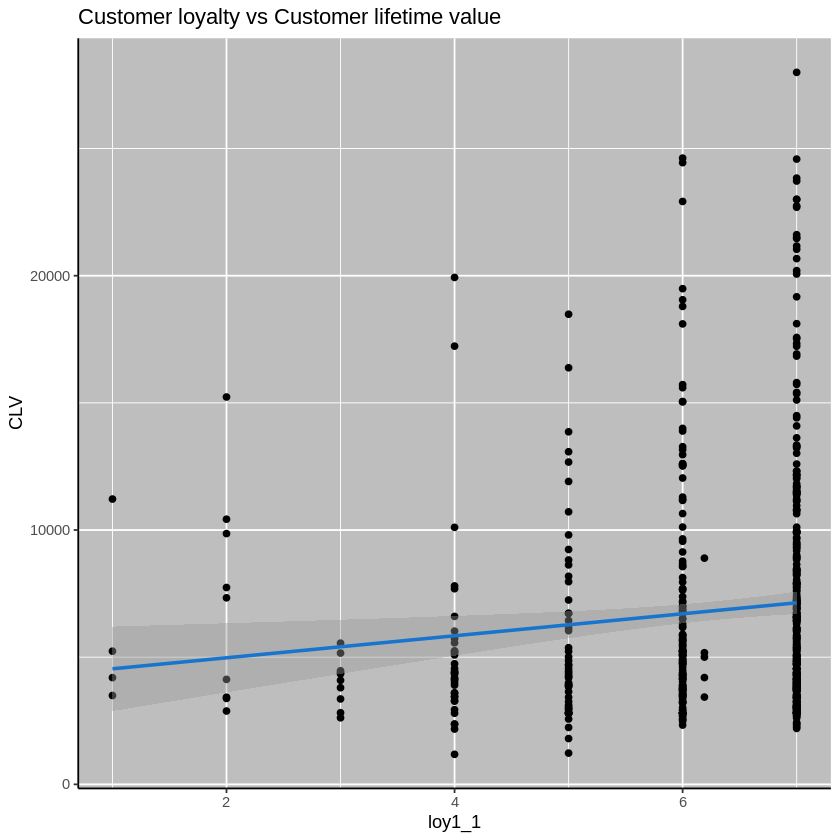

In [ ]:
model_5 <- lm(CLV ~ loy1_1)
summary(model_5)

ggplot(data = CW_Dataset, aes(x = loy1_1, y = CLV)) +
        geom_point() +
        stat_smooth(method = "lm", col = "dodgerblue3") +
        theme(panel.background = element_rect(fill = "Grey"),
              axis.line.x=element_line(),
              axis.line.y=element_line()) +
        ggtitle("Customer loyalty vs Customer lifetime value")